In [1]:
# Author: Piotr Rybarczyk
import matplotlib.pyplot as plt
import matplotlib.tri as tri

import numpy as np
import csv
import pandas as pd

# Path to file with data
file_path = './lib/data.csv'

# Read & parse data 
X, Y, Z = [], [], []
with open(file_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        X.append(float(row['x']))
        Y.append(float(row['y']))
        Z.append(int(row['z']))
X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

# Build Grid data
grid_X, grid_Y = np.meshgrid(np.unique(X), np.unique(Y))
grid_Z = tri.LinearTriInterpolator(tri.Triangulation(X, Y), Z)(grid_X, grid_Y)

# Setup amount of lines in contur 
levels = np.linspace(np.min(Z), np.max(Z), 10)

# Setup plt
fig, ax = plt.subplots(figsize=(12, 8))

# Add <x,y> points to plot
ax.plot(X, Y, 'o', markersize=2, color='grey')
# Add grid data to plot
ax.contourf(grid_X, grid_Y, grid_Z, levels=levels, cmap='viridis')

plt.show()

In [2]:
# Author: 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

# Ścieżka do pliku CSV
file_path = './lib/data.csv'

# Wczytywanie danych z pliku CSV
data = pd.read_csv(file_path)

# Dodanie nagłówków kolumn, jeśli są nieobecne w pliku CSV
data.columns = ['x', 'y', 'z']

# Wyodrębnienie wartości x, y, i z
x = data['x']
y = data['y']
z = data['z']

# Tworzenie triangulacji
triang = tri.Triangulation(x, y)

# Tworzenie figury i osi
fig, ax = plt.subplots(figsize=(12, 8))

# Dodawanie szarych punktów reprezentujących dane
ax.plot(x, y, 'o', markersize=2, color='grey')

# Tworzenie wykresu tricontourf z danych
contour = ax.tricontourf(triang, z, cmap='coolwarm')

# Dodanie paska kolorów
plt.colorbar(contour, ax=ax, label='Wartość')

# Ustawienie zakresów osi
ax.set_xlim(min(data['x']), max(data['x']))
ax.set_ylim(min(data['y']), max(data['y']))

# Dodanie tytułu i etykiet
ax.set_title('Wykres TRICONTOURF z szarymi punktami danych')
ax.set_xlabel('Współrzędna X')
ax.set_ylabel('Współrzędna Y')

# Wyświetlenie wykresu
plt.show()

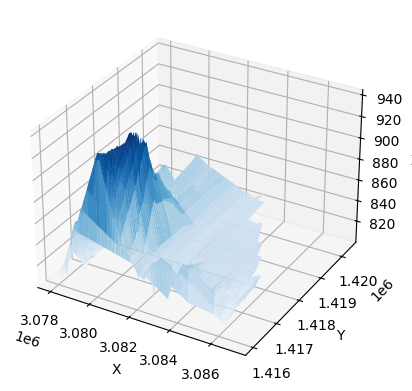

In [15]:
# Author: Piotr Rybarczyk
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib import cm

import numpy as np
import csv
import pandas as pd

# Path to file with data
file_path = './lib/data.csv'

# Read & parse data 
X, Y, Z = [], [], []
with open(file_path, newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        X.append(float(row['x']))
        Y.append(float(row['y']))
        Z.append(int(row['z']))
X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)

# Build Grid data
grid_X, grid_Y = np.meshgrid(np.unique(X), np.unique(Y))
grid_Z = tri.LinearTriInterpolator(tri.Triangulation(X, Y), Z)(grid_X, grid_Y)

# Setup plt
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Add <x,y> points to plot
ax.plot_surface(grid_X, grid_Y, grid_Z, vmin=grid_Z.min(), vmax=grid_Z.max(), cmap=cm.Blues)
# Add grid data to plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()